In [6]:
!pip install matplotlib

  Using cached matplotlib-3.3.4-cp36-cp36m-macosx_10_9_x86_64.whl (8.5 MB)
  Using cached kiwisolver-1.3.1-cp36-cp36m-macosx_10_9_x86_64.whl (61 kB)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
nft_df = pd.read_csv('./Data/nft_data.csv', low_memory=False)
tweets_df = pd.read_csv('./Data/tweets.csv', low_memory=False)
google_trend_region_df = pd.read_csv('./Data/google_trend_per_region.csv')
google_trend_time_df = pd.read_csv('./Data/google_trend_over_time.csv')

# Evaluate Twitter profiles

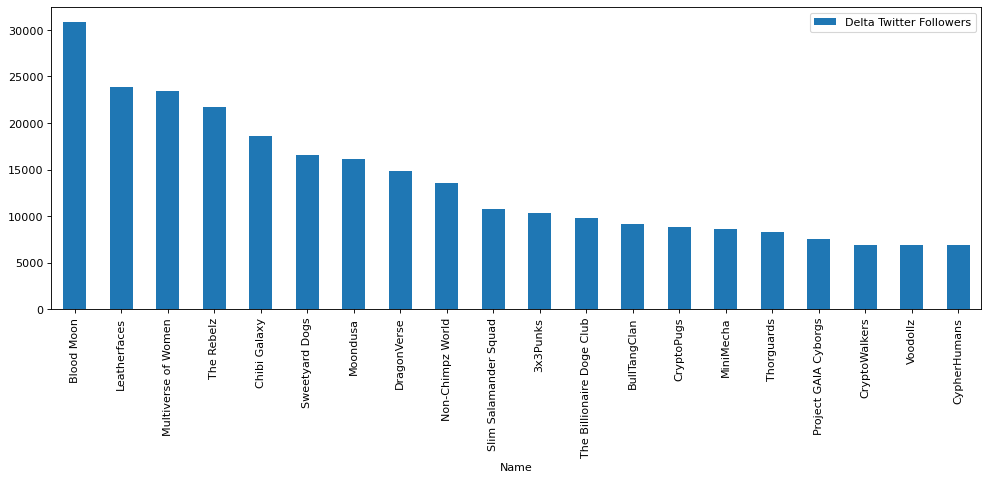

In [180]:
# Calculate the difference between followers and friends "Followings"
nft_df['Delta Twitter Followers'] = nft_df['Twitter User Followers Count'] - nft_df['Twitter User Friends Count']

# Sort values and filter top profiles
nft_df_sorted = nft_df.sort_values(['Delta Twitter Followers'], ascending=False)[0:20]

# Plot name vs price
fig = plt.figure(figsize=(15, 5), dpi=80)
ax = fig.add_subplot(111)
nft_df_sorted.plot(x='Name', y='Delta Twitter Followers', kind='bar', ax=ax)
plt.xticks(rotation='vertical')
plt.show()

In [232]:
# Set index with numbers for the use of Streamlit "bar_chart" method
nft_df_sorted.set_index(['{:0>2d} - '.format(i) for i in range(1, len(nft_df_sorted)+1)] + nft_df_sorted['Name'])

,Name,Description,Website,Price ETH,Twitter Username,Twitter User Created,Twitter User Description,Twitter User Favourites Count,Twitter User Followers Count,Twitter User Friends Count,Twitter User Listed Count,Twitter User Statuses Count,Twitter User Media Count,Twitter User Location,Twitter User Profile Banner Url,Twitter User Profile Image Url,Delta Twitter Followers
Name,,,,,,,,,,,,,,,,,
01 - Blood Moon,Blood Moon,Werewolf themed avatar NFTs,www.bloodmoon.club,0.0700,UltraRareUK,2020-10-11 12:24:31+00:00,🎃 Mint Pass sale is live @ 0.13 ETH👈 The first...,11484.0,31115.0,226.0,68.0,1824.0,493.0,The Metaverse,https://pbs.twimg.com/profile_banners/13152669...,https://pbs.twimg.com/profile_images/145366063...,30889.0
02 - Leatherfaces,Leatherfaces,Leatherface themed avatar NFTs,leatherfaces.io,0.0666,mutantpunks,2021-08-15 01:21:16+00:00,The First #NFT collection of 11111 unique MUTA...,76.0,23858.0,7.0,4.0,42.0,20.0,Mutant City,https://pbs.twimg.com/profile_banners/14267155...,https://pbs.twimg.com/profile_images/144292523...,23851.0
03 - Multiverse of Women,Multiverse of Women,Female first PFP community project,multiverseofwomen.art,0.0500,getdogebillions,2021-08-22 21:42:36+00:00,Official Launch Date:November 19 @7pm CST. Dis...,276.0,23562.0,95.0,9.0,180.0,40.0,The Moon,https://pbs.twimg.com/profile_banners/14295595...,https://pbs.twimg.com/profile_images/145534824...,23467.0
04 - The Rebelz,The Rebelz,Rebel themed animal avatar NFTs,www.rebelznft.com,0.0490,M101_Shelter,2021-09-16 15:35:59+00:00,M101 is generative side-profile transgalactic ...,58.0,22027.0,279.0,9.0,77.0,59.0,Cape Canaveral,https://pbs.twimg.com/profile_banners/14385268...,https://pbs.twimg.com/profile_images/144101159...,21748.0
05 - Chibi Galaxy,Chibi Galaxy,3D interstellar themed chibi character NFTs,chibilabs.io,0.0600,ChibiLabs,2018-08-24 11:25:50+00:00,Home to futuristic 3D characters | Chibi Galax...,2423.0,19262.0,682.0,45.0,1650.0,343.0,Chibi Nation,https://pbs.twimg.com/profile_banners/10329521...,https://pbs.twimg.com/profile_images/145521554...,18580.0
06 - Sweetyard Dogs,Sweetyard Dogs,Dog themed NFTs on Ethereum,sweetyard.dog,0.0500,AngelsOasisNFT,2021-10-08 10:57:07+00:00,"8,888 Diverse, Unique & Beautiful winged women...",2297.0,16814.0,193.0,4.0,171.0,42.0,Metaverse,https://pbs.twimg.com/profile_banners/14464291...,https://pbs.twimg.com/profile_images/145772436...,16621.0
07 - Moondusa,Moondusa,Medusa themed avatar NFTs,moondusa.io,0.0700,FruitOnSpace,2021-08-31 06:36:06+00:00,"Welcome to Fruitos, the character NFT based fr...",59.0,16364.0,260.0,8.0,127.0,71.0,Space,https://pbs.twimg.com/profile_banners/14325929...,https://pbs.twimg.com/profile_images/143503528...,16104.0
08 - DragonVerse,DragonVerse,Dragon NFTs with game tie-in,www.dragonverse.io,0.0800,Moondusa,2010-04-22 06:50:55+00:00,You can find 👀 Moondusa floating through outer...,2975.0,16499.0,1649.0,4.0,203.0,48.0,"Miami, FL",https://pbs.twimg.com/profile_banners/13578220...,https://pbs.twimg.com/profile_images/145208846...,14850.0
09 - Non-Chimpz World,Non-Chimpz World,3D non-chimpz themed avatar NFTs,nonchimpz.com,0.0555,NonChimpz,2021-09-30 21:01:42+00:00,Join us as one of the 17 777 chimps that trans...,157.0,13643.0,131.0,6.0,47.0,23.0,NaN,https://pbs.twimg.com/profile_banners/14436822...,https://pbs.twimg.com/profile_images/144744984...,13512.0


# Plot last tweets

In [8]:
# Drop tweets with undifined search query
tweets_df = tweets_df.dropna(subset=['Search Query'])

# Keep only unique Username for each Search Query
unique_tweet_df = tweets_df.drop_duplicates(subset=['Search Query', 'Username'])

# Max, mean and count of unique tweets
max_followers_df = unique_tweet_df[['User Followers Count', 'Search Query']].groupby(['Search Query']).max()
mean_followers_df = unique_tweet_df[['User Followers Count', 'Search Query']].groupby(['Search Query']).mean()
count_followers_df = unique_tweet_df[['User Followers Count', 'Search Query']].groupby(['Search Query']).count()
med_followers_df = unique_tweet_df[['User Followers Count', 'Search Query']].groupby(['Search Query']).quantile(q=0.5)

# Top NFT with max followers in past seven days
top_max_followers_df = max_followers_df.sort_values(['User Followers Count'], ascending=False).iloc[0:30]
top_mean_followers_df = mean_followers_df.sort_values(['User Followers Count'], ascending=False).iloc[0:30]
top_count_followers_df = count_followers_df.sort_values(['User Followers Count'], ascending=False).iloc[0:30]
top_med_followers_df = med_followers_df.sort_values(['User Followers Count'], ascending=False).iloc[0:30]

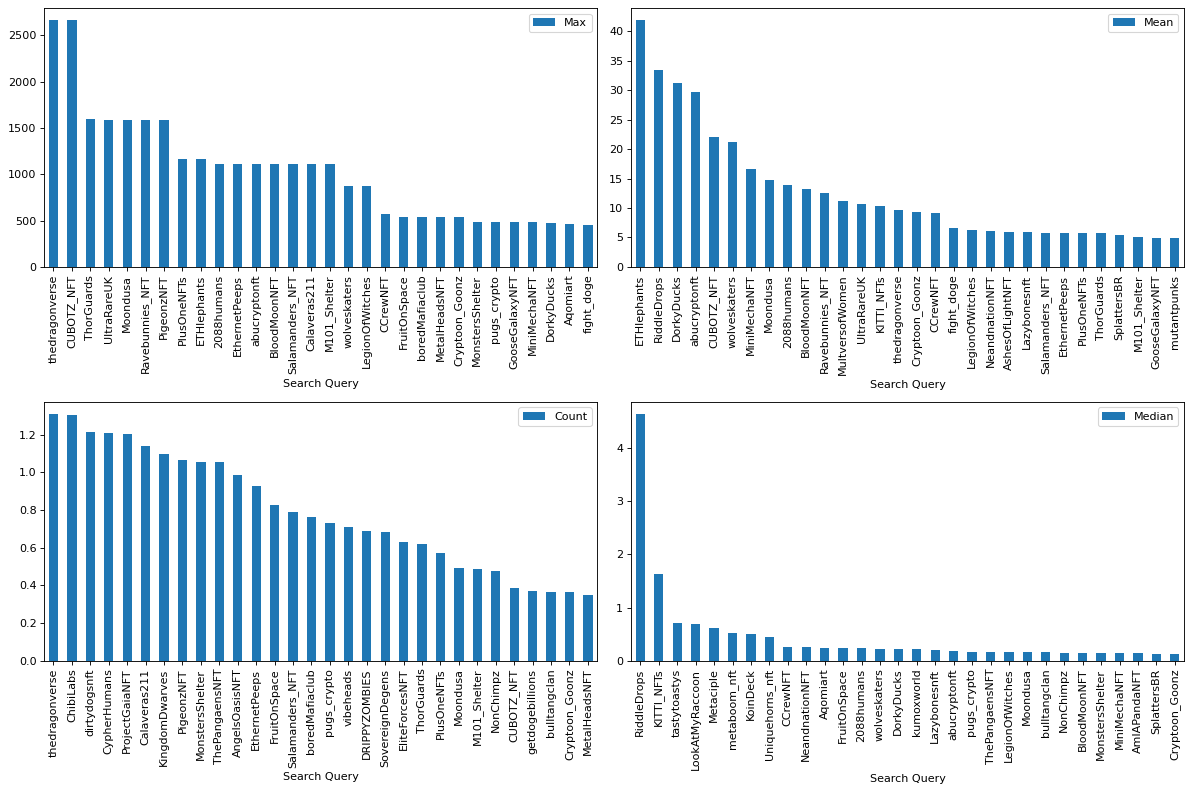

In [22]:
# Plot
fig = plt.figure(figsize=(15,10), dpi=80)

ax1 = plt.subplot(221)
top_max_followers_df_tausend = top_max_followers_df*1e-3
top_max_followers_df_tausend.plot(kind='bar', ax=ax1)
ax1.legend(["Max"],loc="upper right")

ax2 = plt.subplot(222)
top_mean_followers_df_tausend = top_mean_followers_df*1e-3
top_mean_followers_df_tausend.plot(kind='bar', ax=ax2)
ax2.legend(["Mean"],loc="upper right")

ax3 = plt.subplot(223)
top_count_followers_df_tausend = top_count_followers_df*1e-3
top_count_followers_df_tausend.plot(kind='bar', ax=ax3)
ax3.legend(["Count"],loc="upper right")

ax4 = plt.subplot(224)
top_med_followers_df_tausend = top_med_followers_df*1e-3
top_med_followers_df_tausend.plot(kind='bar', ax=ax4)
ax4.legend(["Median"],loc="upper right")

fig.tight_layout()
plt.show()

# Evaluate last tweets

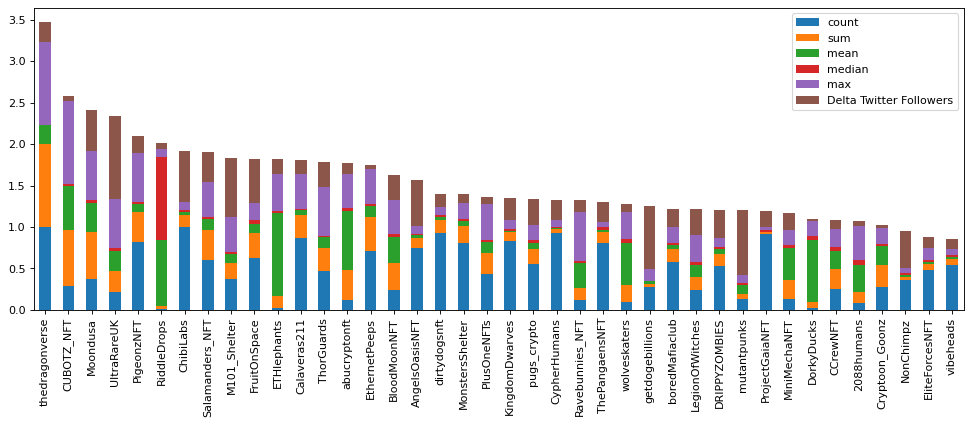

In [177]:
# Group and aggregate
tweets_followers_df = unique_tweet_df[['Search Query', 'User Followers Count']].groupby(['Search Query']).agg({'User Followers Count': ['count', 'sum', 'mean', 'median', 'max']})['User Followers Count']

# Merge
merged_df = tweets_followers_df.merge(nft_df.set_index('Twitter Username')['Delta Twitter Followers'], left_index=True, right_index=True, how='inner')

# Min-max normalization
merged_norm_df=(merged_df-merged_df.min())/(merged_df.max()-merged_df.min())

# Calculate "hype" indicator
merged_norm_df['hype indicator'] = merged_norm_df.sum(axis=1)

# Get the top NFT according to the "hype" indicator
top_nfts_df = merged_norm_df.sort_values('hype indicator', ascending=False)[0:40]

# Plot
fig = plt.figure(figsize=(15,5), dpi=80)
ax = fig.add_subplot(111)
top_nfts_df.drop('hype indicator', axis=1).plot(kind='bar', ax=ax, stacked=True)
plt.show()

# Evaluate Google Trend

## Google trend per region

In [9]:
google_trend_region_df.head(3)

,geoName,Nft
0,Afghanistan,0
1,Albania,0
2,Algeria,0


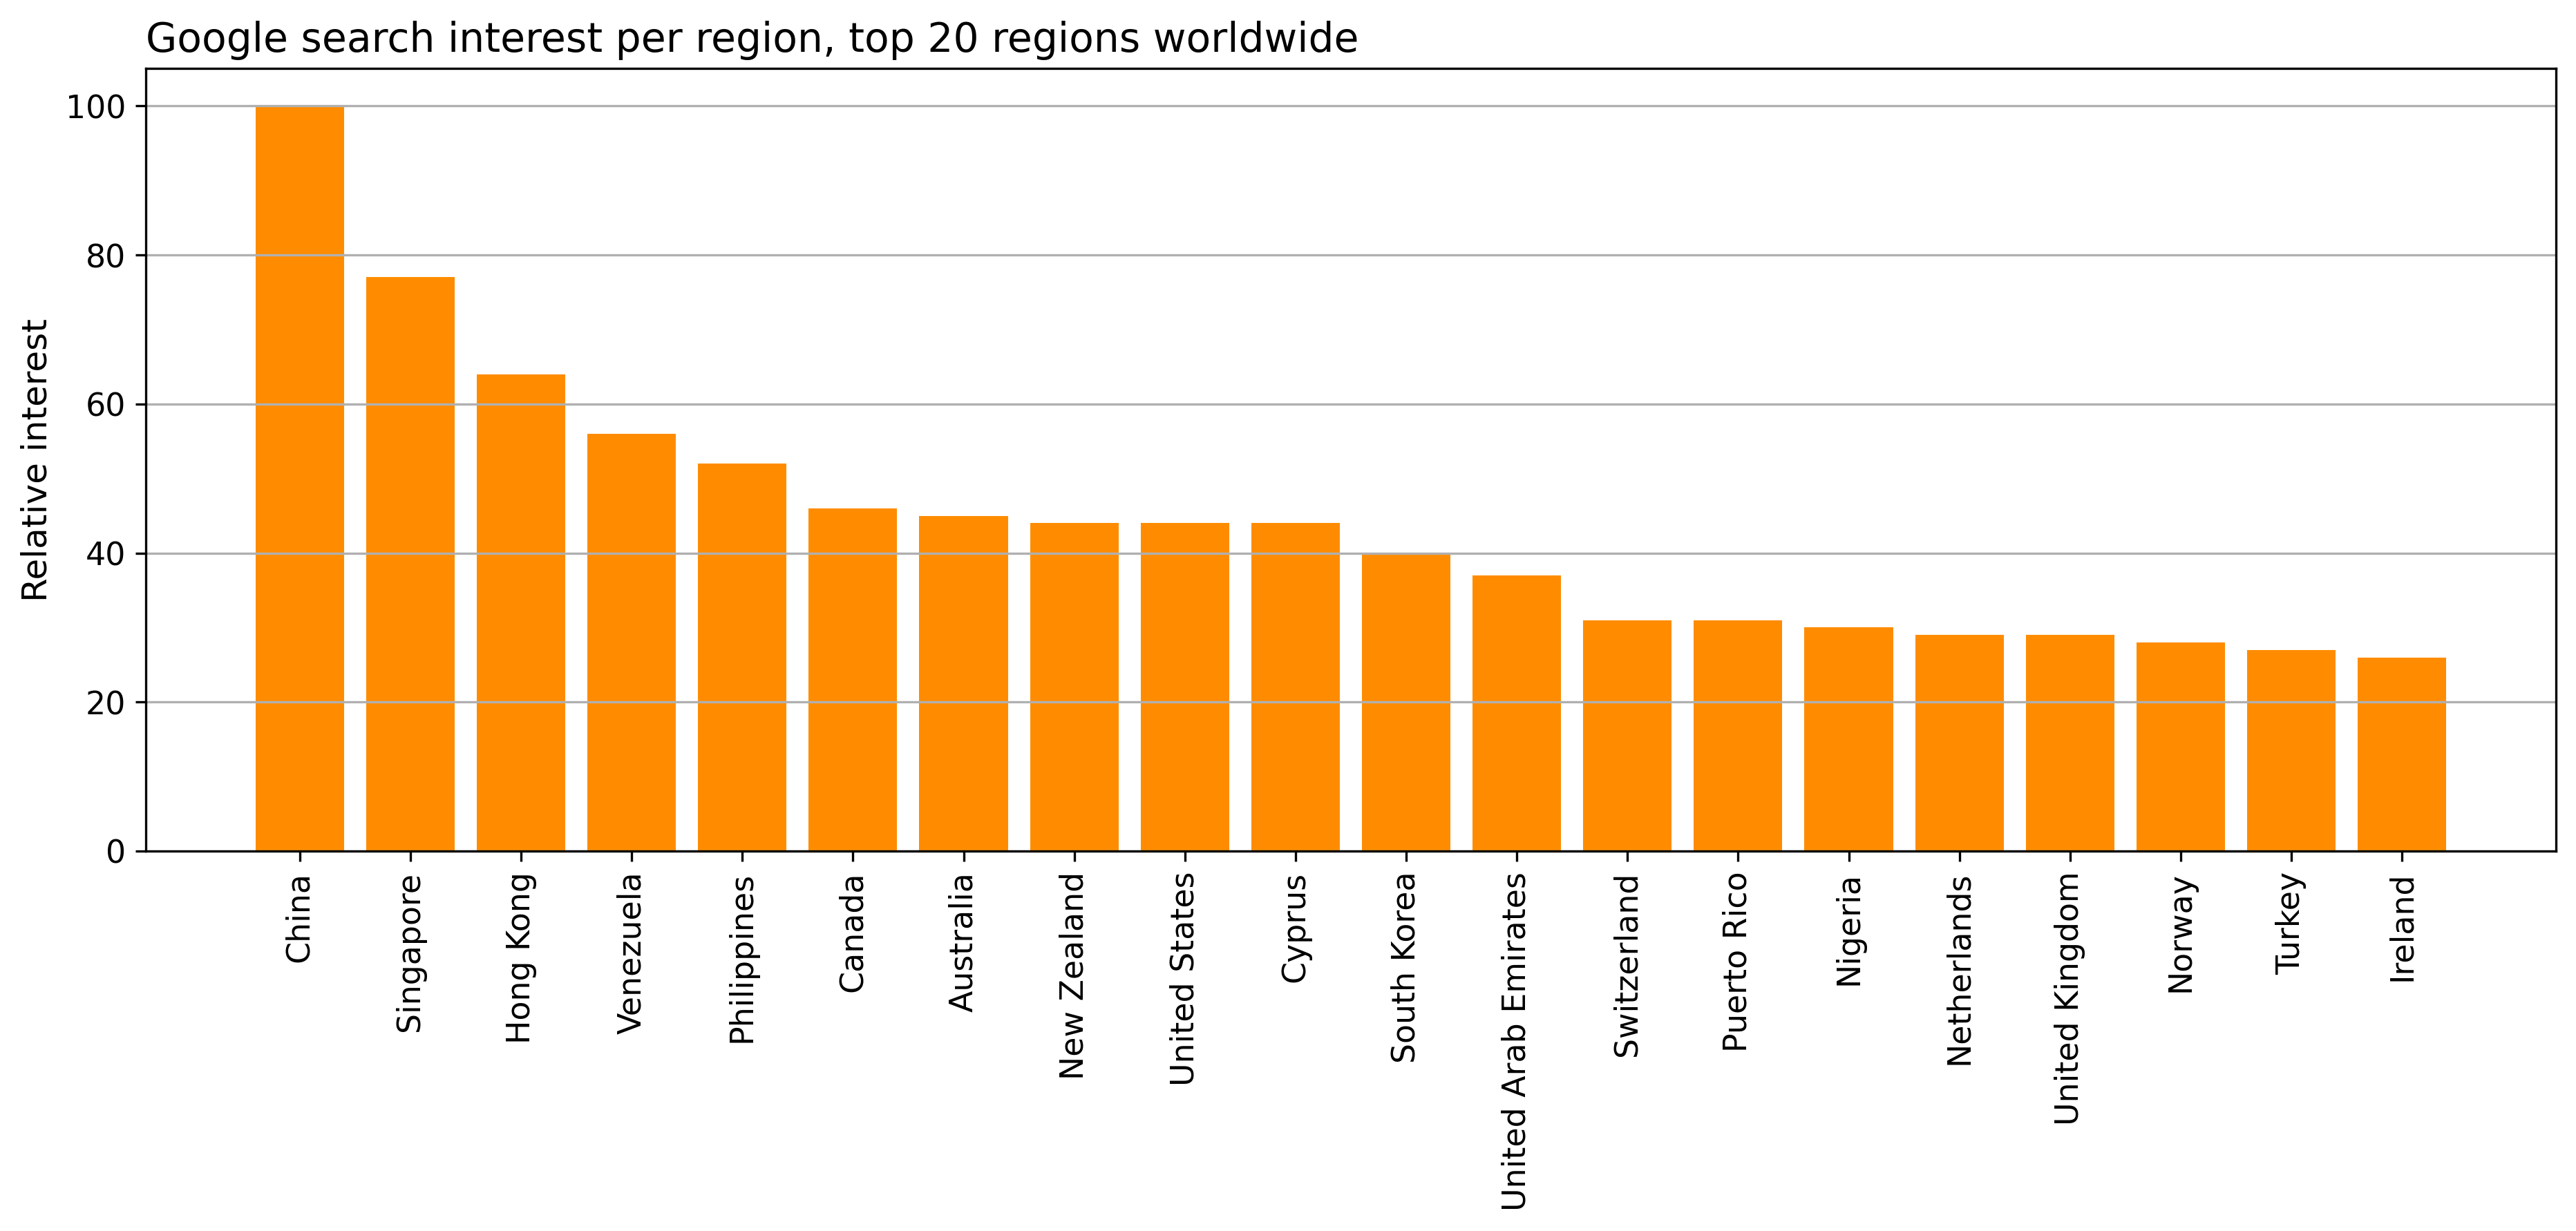

In [23]:
# Sort the values per region and store regions with most interest
top_google_trend_region_df = google_trend_region_df.sort_values(['Nft'], ascending=False).iloc[0:20]

# Plot the data
fig = plt.figure(figsize=(15,5), dpi=300)
ax = fig.add_subplot(111)
ax.bar(top_google_trend_region_df['geoName'], top_google_trend_region_df['Nft'], color='darkorange')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Google search interest per region, top 20 regions worldwide', fontsize=14, loc='left')
plt.ylabel('Relative interest',  fontsize=12)
plt.grid(True, axis='y')
plt.show()
fig.savefig('gg_trend.png', dpi=300, bbox_inches='tight')

## Google trend over time

In [25]:
# Clean and sort the data according to the date column
google_trend_time_df['date'] = pd.to_datetime(google_trend_time_df['date'])
google_trend_time_df = google_trend_time_df.sort_values(by='date', ascending=True)

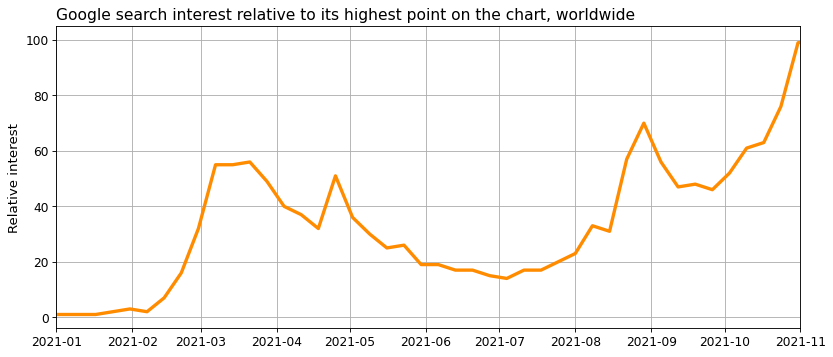

In [26]:
# Plot Google interest over time
fig = plt.figure(figsize=(12,5), dpi=80)
ax = fig.add_subplot(111)
ax.plot(google_trend_time_df['date'], google_trend_time_df['Nft'],
        color='darkorange',linewidth=3.0)
ax.set_xlim([pd.to_datetime('2021-01'), pd.to_datetime('2021-11')])
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.title('Google search interest relative to its highest point on the chart, worldwide', fontsize=14, loc='left')
plt.ylabel('Relative interest',  fontsize=12)
plt.grid(True)
plt.show()
fig.savefig('gg_trend_time.png', dpi=300, bbox_inches='tight')